<a href="https://colab.research.google.com/github/LeonardoBusculo/dataset-para-modelagem-de-dados/blob/main/Desafio5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#INSTALAÇÕES NECESSÁRIAS
%pip install sidetable -q

In [ ]:
#IMPORTANDO AS BIBLIOTECAS QUE SERÃO UTILIZADAS PARA O DESAFIO
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import sidetable as stb
import statistics as sts
import warnings

from sklearn.cluster import(KMeans, DBSCAN, MeanShift, AgglomerativeClustering)
from sklearn.mixture import GaussianMixture

from sklearn.metrics import(silhouette_score, davies_bouldin_score, calinski_harabasz_score)

from scipy.cluster.hierarchy import (linkage, dendrogram, fcluster)
from yellowbrick.cluster import (KElbowVisualizer,
                                 SilhouetteVisualizer,
                                 kelbow_visualizer,
                                 silhouette_visualizer)

from sklearn.preprocessing import (StandardScaler, scale, PowerTransformer)

from sklearn.compose import ColumnTransformer

from sklearn.pipeline import Pipeline

warnings.filterwarnings('ignore')

In [ ]:
sns.set_theme(
    context='talk',
    style='ticks',
    font_scale=.8,
    palette='tab10',
    rc={
        'figure.figsize': (12,8),
        'axes.grid': True,
        'grid.alpha': .2,
        'axes.titlesize': 'x-large',
        'axes.titleweight': 'bold',
        'axes.titlepad': 20,
    }
)

scatter_kwargs = dict(palette='viridis', alpha=0.8, linewidth=0)

In [ ]:
df = pd.read_csv(r"/content/data.csv", encoding ="latin1")
print(df.shape)
df.head()

(541909, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


# COMEÇAREMOS NOSSA ANÁLISE DESCRITIVA

In [ ]:
#SHAPE ESTÁ SENDO USADO PARA SABER QUANTAS LINHAS E COLUNAS TEMOS
df.shape

(541909, 8)

In [ ]:
#NOMES DAS COLUNAS
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [ ]:
#DISTRIBUIÇÕES ESTATÍSTICAS
df.describe(percentiles = [0.01, 0.1, 0.25, 0.5, 0.75, 0.90, 0.99])

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
1%,-2.000000,0.190000,12415.000000
10%,1.000000,0.630000,12876.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
90%,24.000000,7.950000,17719.000000


In [ ]:
#.INFO É USADO PARA SABER AS CLASSES E CONTAGEM DE VALORES NÃO NULOS
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [ ]:
#SOMA DE VALORES NULOS
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [ ]:
#PERCENTUAL DE VALORES QUE ESTÃO AUSENTES
(
df.isna().sum()
.to_frame("Valores NA")
.assign(missing_pct=lambda x:x.div(len(df)))
.sort_values("Valores NA",ascending= False))

,Valores NA,missing_pct
CustomerID,135080,0.249267
Description,1454,0.002683
InvoiceNo,0,0.000000
StockCode,0,0.000000
Quantity,0,0.000000
InvoiceDate,0,0.000000
UnitPrice,0,0.000000
Country,0,0.000000


In [ ]:
#SABENDO SE EXISTE VALORES NEGATIVOS
df.loc[df["UnitPrice"] < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,2011-08-12,-11062.06,<NA>,United Kingdom
299984,A563187,B,Adjust bad debt,1,2011-08-12,-11062.06,<NA>,United Kingdom


In [ ]:
#SABENDO SE HÁ "QUANTITY" NEGATIVO
df.loc[df["Quantity"]<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/9/2011 9:57,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,12/9/2011 10:28,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12/9/2011 11:57,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12/9/2011 11:58,1.25,17315.0,United Kingdom


In [ ]:
df.duplicated().sum()

5268

In [ ]:
df.stb.freq(["Country"]).head(10)

,Country,count,percent,cumulative_count,cumulative_percent
0,United Kingdom,495478,91.431956,495478,91.431956
1,Germany,9495,1.752139,504973,93.184095
2,France,8557,1.579047,513530,94.763143
3,EIRE,8196,1.512431,521726,96.275574
4,Spain,2533,0.467422,524259,96.742996
5,Netherlands,2371,0.437527,526630,97.180523
6,Belgium,2069,0.381798,528699,97.562321
7,Switzerland,2002,0.369435,530701,97.931756
8,Portugal,1519,0.280305,532220,98.212061
9,Australia,1259,0.232327,533479,98.444388


In [ ]:
(df.groupby(df.columns.to_list(), dropna = False).size().to_frame("Duplicates").query("Duplicates > 1").sort_values("Duplicates", ascending = False))

Duplicates
InvoiceNo StockCode Description                         Quantity InvoiceDate      UnitPrice CustomerID Country                   
555524    22698     PINK REGENCY TEACUP AND SAUCER       1       6/5/2011 11:37   2.95      16923.0    United Kingdom          20
          22697     GREEN REGENCY TEACUP AND SAUCER      1       6/5/2011 11:37   2.95      16923.0    United Kingdom          12
572861    22775     PURPLE DRAWERKNOB ACRYLIC EDWARDIAN  12      10/26/2011 12:46 1.25      14102.0    United Kingdom           8
541266    21755     LOVE BUILDING BLOCK WORD             1       1/16/2011 16:25  5.95      15673.0    United Kingdom           6
572344    M         Manual                               48      10/24/2011 10:43 1.50      14607.0    United Kingdom           6
...                                                                                                                           ...
556484    22326     ROUND SNACK BOXES SET OF4 WOODLAND   2       6/12/2011 13:17  2.95      16938.0    United Kingdom           2
          22139     RETROSPOT TEA SET CERAMIC 11 PC      1       6/12/2011 13:17  4.95      16938.0    United Kingdom           2
556481    23182     TOILET SIGN OCCUPIED OR VACANT       3       6/12/2011 13:00  0.83      16115.0    United Kingdom           2
556473    22727     ALARM CLOCK BAKELIKE RED             1       6/12/2011 12:00  3.75      17265.0    United Kingdom           2
C580764   22667     RECIPE BOX RETROSPOT                -12      12/6/2011 10:38  2.95      14562.0    United Kingdom           2

[4879 rows x 1 columns]

# FAREMOS NOSSA ANÁLISE EXPLORATÓRIA E DATA CLEANING

In [ ]:
#MUDANDO FORMATO DE DATA
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"],format='%m/%d/%Y %H:%M').dt.date
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"],format='%Y-%m-%d')

df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [ ]:
#MOSTRANDO A PRIMEIRA LINHA SÓ PARA GARANTIR QUE FOI FEITA A MUDANÇA
df.head(1)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850.0,United Kingdom


In [ ]:
df["CustomerID"] = df["CustomerID"].astype("Int64")
df.dtypes


InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID              Int64
Country                object
dtype: object

In [ ]:
# REMOVENDO DADOS QUE TENHAM NA
df1 = df.dropna(axis = 0, how = "any")
actual = len(df) - len(df1)
print(f"Forma removidos no total {actual} de linhas")

Forma removidos no total 135080 de linhas


In [ ]:
#VERIFICANDO SE AINDA EXISTE ALGUM VALOR NA
df1.stb.missing()

,missing,total,percent
InvoiceNo,0,406829,0.0
StockCode,0,406829,0.0
Description,0,406829,0.0
Quantity,0,406829,0.0
InvoiceDate,0,406829,0.0
UnitPrice,0,406829,0.0
CustomerID,0,406829,0.0
Country,0,406829,0.0


In [ ]:
#REMOVENDO VALORES FORA DO PADRÃO
df1 = df1.loc[df1["Quantity"] > 0]
df1

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09,0.85,12680,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09,2.10,12680,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09,4.15,12680,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09,4.15,12680,France


In [ ]:
#REMOVENDO DUPLICATAS
df1.drop_duplicates(keep = "first", inplace = True)
df1

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09,0.85,12680,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09,2.10,12680,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09,4.15,12680,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09,4.15,12680,France


In [ ]:
#REMOVENDO UNIT PRICE COM FILTRO DE VALORES ACIMA DE 0
df1 = df1.loc[df1["UnitPrice"] > 0]
df1

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09,0.85,12680,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09,2.10,12680,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09,4.15,12680,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09,4.15,12680,France


In [ ]:
#FAZENDO A ANÁLISE DE TEM ALGUM PAIS DE ESCRITA INCONSCIENTE
df1.groupby("Country").size()

Country
Australia                 1181
Austria                    398
Bahrain                     17
Belgium                   2031
Brazil                      32
Canada                     151
Channel Islands            747
Cyprus                     603
Czech Republic              25
Denmark                    380
EIRE                      7226
European Community          60
Finland                    685
France                    8326
Germany                   9025
Greece                     145
Iceland                    182
Israel                     245
Italy                      758
Japan                      321
Lebanon                     45
Lithuania                   35
Malta                      112
Netherlands               2359
Norway                    1071
Poland                     330
Portugal                  1453
RSA                         57
Saudi Arabia                 9
Singapore                  222
Spain                     2479
Sweden                     450


In [ ]:
#REMOVENDO OS VALORES "UNSPECIFIED"
df1 = df1.loc[~(df1["Country"]=="Unspecified")]
df1.groupby("Country").size()

Country
Australia                 1181
Austria                    398
Bahrain                     17
Belgium                   2031
Brazil                      32
Canada                     151
Channel Islands            747
Cyprus                     603
Czech Republic              25
Denmark                    380
EIRE                      7226
European Community          60
Finland                    685
France                    8326
Germany                   9025
Greece                     145
Iceland                    182
Israel                     245
Italy                      758
Japan                      321
Lebanon                     45
Lithuania                   35
Malta                      112
Netherlands               2359
Norway                    1071
Poland                     330
Portugal                  1453
RSA                         57
Saudi Arabia                 9
Singapore                  222
Spain                     2479
Sweden                     450


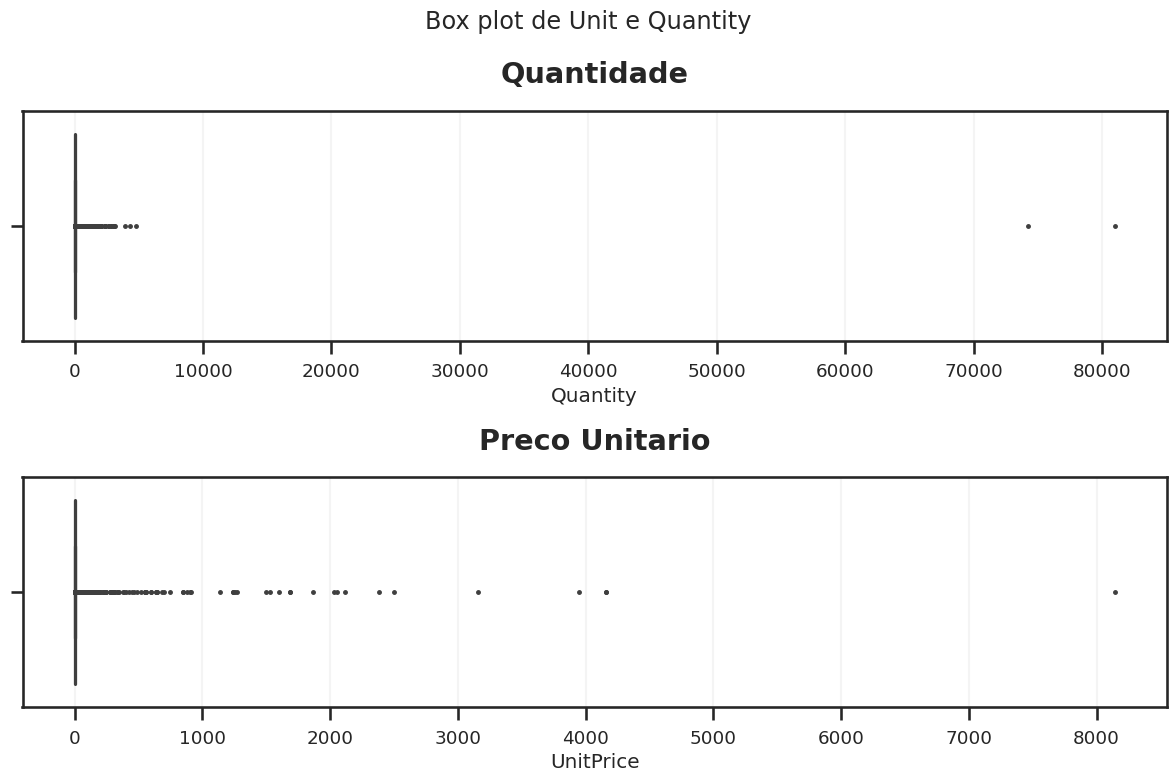

In [ ]:
#PLOTANDO BOXPLOT
fig = plt.figure()
fig.subplots_adjust(hspace = 0.4, top = 0.85)
fig.suptitle("Box plot de Unit e Quantity")
ax1 = fig.add_subplot(2,1,1)
sns.boxplot(df1, x = "Quantity", orient = "h", flierprops = {"marker": "."}).set(title = "Quantidade")
ax1 = fig.add_subplot(2,1,2)
sns.boxplot(df1, x = "UnitPrice", orient = "h", flierprops = {"marker": "."}).set(title = "Preco Unitario")
plt.tight_layout();

In [ ]:
df1.query("UnitPrice > 5000 | Quantity > 10000")

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18,1.04,12346,United Kingdom
173382,551697,POST,POSTAGE,1,2011-05-03,8142.75,16029,United Kingdom
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09,2.08,16446,United Kingdom


In [ ]:
df1=df1.loc[~(df1["Quantity"] > 10000)]
df1=df1.loc[~(df1["UnitPrice"]> 5000)]

In [ ]:
df1.query("UnitPrice > 5000 | Quantity > 10000")

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


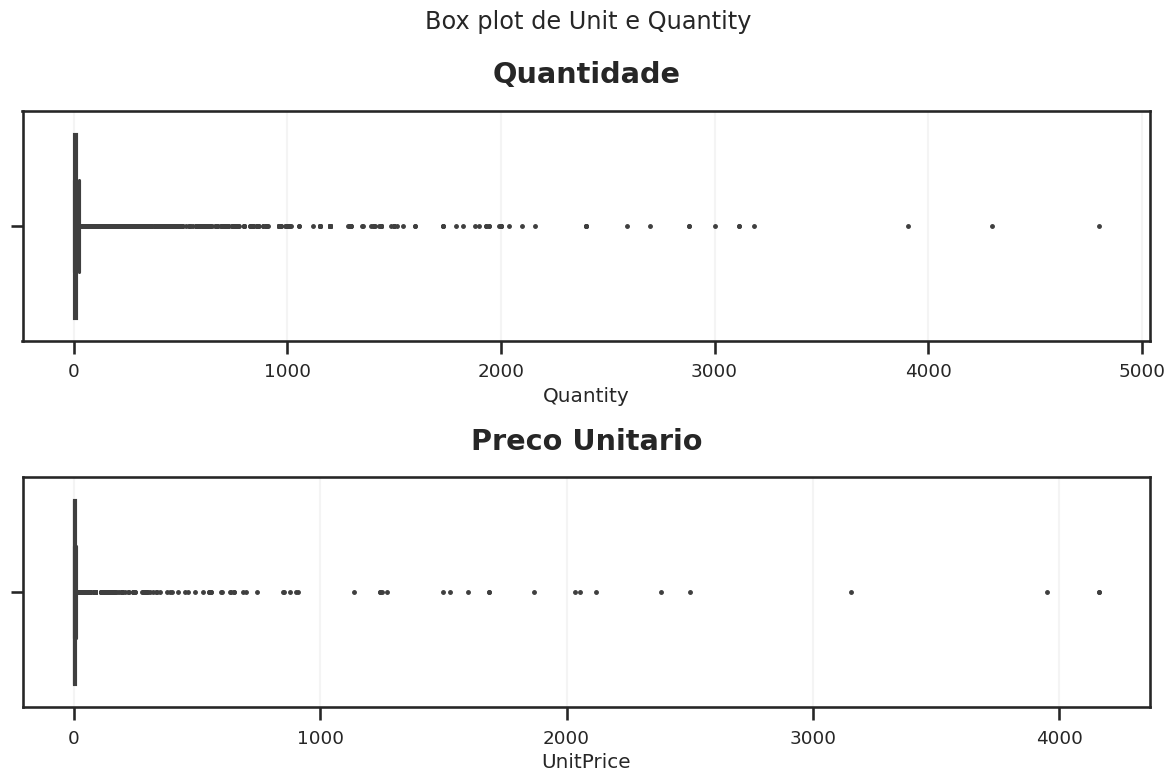

In [ ]:
#PLOTANDO BOXPLOT PARA VERIFICAR A REMOÇÃO DE VALORES ACIMA DE 5000 E 10000
fig = plt.figure()
fig.subplots_adjust(hspace = 0.4, top = 0.85)
fig.suptitle("Box plot de Unit e Quantity")
ax1 = fig.add_subplot(2,1,1)
sns.boxplot(df1, x = "Quantity", orient = "h", flierprops = {"marker": "."}).set(title = "Quantidade")
ax1 = fig.add_subplot(2,1,2)
sns.boxplot(df1, x = "UnitPrice", orient = "h", flierprops = {"marker": "."}).set(title = "Preco Unitario")
plt.tight_layout();

In [ ]:
df1.describe(percentiles = [.01,0.1,0.25,0.5,0.75,0.90,0.99])

,Quantity,UnitPrice,CustomerID
count,392447.000000,392447.000000,392447.0
mean,12.727844,3.105127,15288.802248
std,43.096208,18.060421,1713.220519
min,1.000000,0.001000,12347.0
1%,1.000000,0.210000,12415.0
10%,1.000000,0.550000,12877.0
25%,2.000000,1.250000,13956.0
50%,6.000000,1.950000,15152.0
75%,12.000000,3.750000,16791.0
90%,24.000000,6.350000,17719.0


# RECENCY, FREQUENCY, MONETARY --- RFM

In [ ]:
#ADICIONANDO A COLUNA DE QUANTITY * UNITPRICE
df1["total"] = df1.apply(lambda x : x ["UnitPrice"] * x ["Quantity"], axis = 1)

In [ ]:
#VERIFICANDO SE A COLUNA FOI ADICIONADA CORRETAMENTE
df1.reset_index(drop = True, inplace = True)
df1.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850,United Kingdom,20.34


In [ ]:
# ULTIMA E PRIMEIRA DATA DE COMPRA
primeira_compra = min(df1["InvoiceDate"])
ultima_compra = max(df1["InvoiceDate"])
print(f"A primeira compra foi no dia {primeira_compra}, já a última compra foi no dia {ultima_compra}")

A primeira compra foi no dia 2010-12-01 00:00:00, já a última compra foi no dia 2011-12-09 00:00:00


In [ ]:
#10 MAIORES COMPRADOS
def top_country(df1:pd.DataFrame, n:int)->pd.DataFrame:
    topcountry = (df1 .groupby("Country").agg({"total":"sum"}).rename({"total":"total"}).sort_values(by = "total", ascending = False).reset_index().head(n))
    return topcountry

topcountry = top_country(df1, 10)
topcountry



,Country,total
0,United Kingdom,7031224.794
1,Netherlands,285446.340
2,EIRE,265262.460
3,Germany,228678.400
4,France,208934.310
5,Australia,138453.810
6,Spain,61558.560
7,Switzerland,56443.950
8,Belgium,41196.340
9,Sweden,38367.830


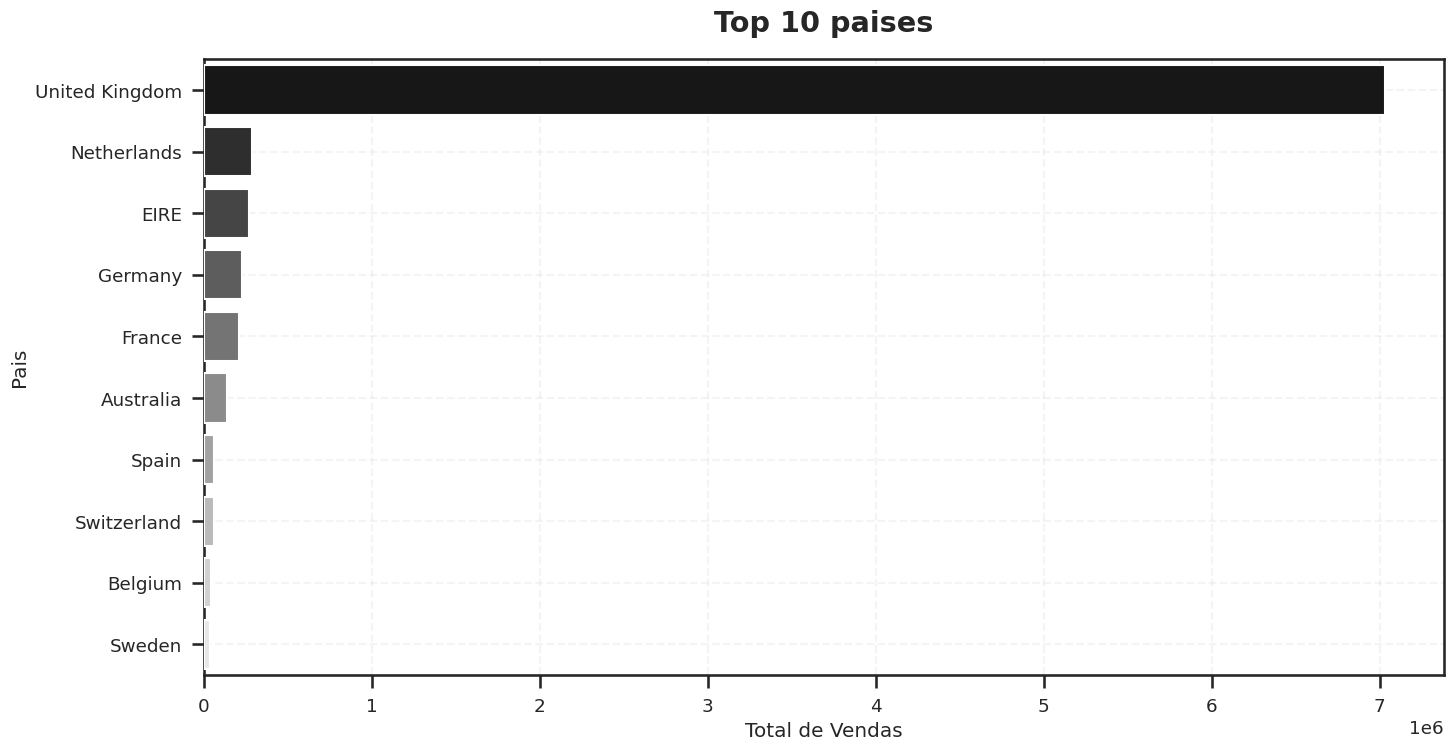

In [ ]:
#PLOTANDO GRAFICO SOBRE OS DADOS ACIMA
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (16,8))
sns.barplot(data = topcountry, x = "total", y = "Country", ax = ax, palette = "gray", zorder = 10)
ax.set_xlabel("Total de Vendas")
ax.set_ylabel("Pais")
ax.set_title("Top 10 paises")
ax.grid(True, linestyle ="--", zorder = 10);

In [ ]:
#CRIAÇÃO DOS 10 PRODUTOS MAIS VENDIDOS
def recomend_products(df:pd.DataFrame, n:int, agg_fun = sum  )->pd.DataFrame:
    topproducts = (df1.groupby("Description").agg({"Quantity":agg_fun}).sort_values("Quantity", ascending=False).rename({"Quantity":"Quantidade"}).reset_index().head(n))
    return topproducts
topproducts = recomend_products(df1, 10, agg_fun = "sum")
topproducts


,Description,Quantity
0,WORLD WAR 2 GLIDERS ASSTD DESIGNS,54319
1,JUMBO BAG RED RETROSPOT,46078
2,WHITE HANGING HEART T-LIGHT HOLDER,36706
3,ASSORTED COLOUR BIRD ORNAMENT,35241
4,PACK OF 72 RETROSPOT CAKE CASES,33646
5,POPCORN HOLDER,30919
6,RABBIT NIGHT LIGHT,27153
7,MINI PAINT SET VINTAGE,26076
8,PACK OF 12 LONDON TISSUES,25329
9,PACK OF 60 PINK PAISLEY CAKE CASES,24206


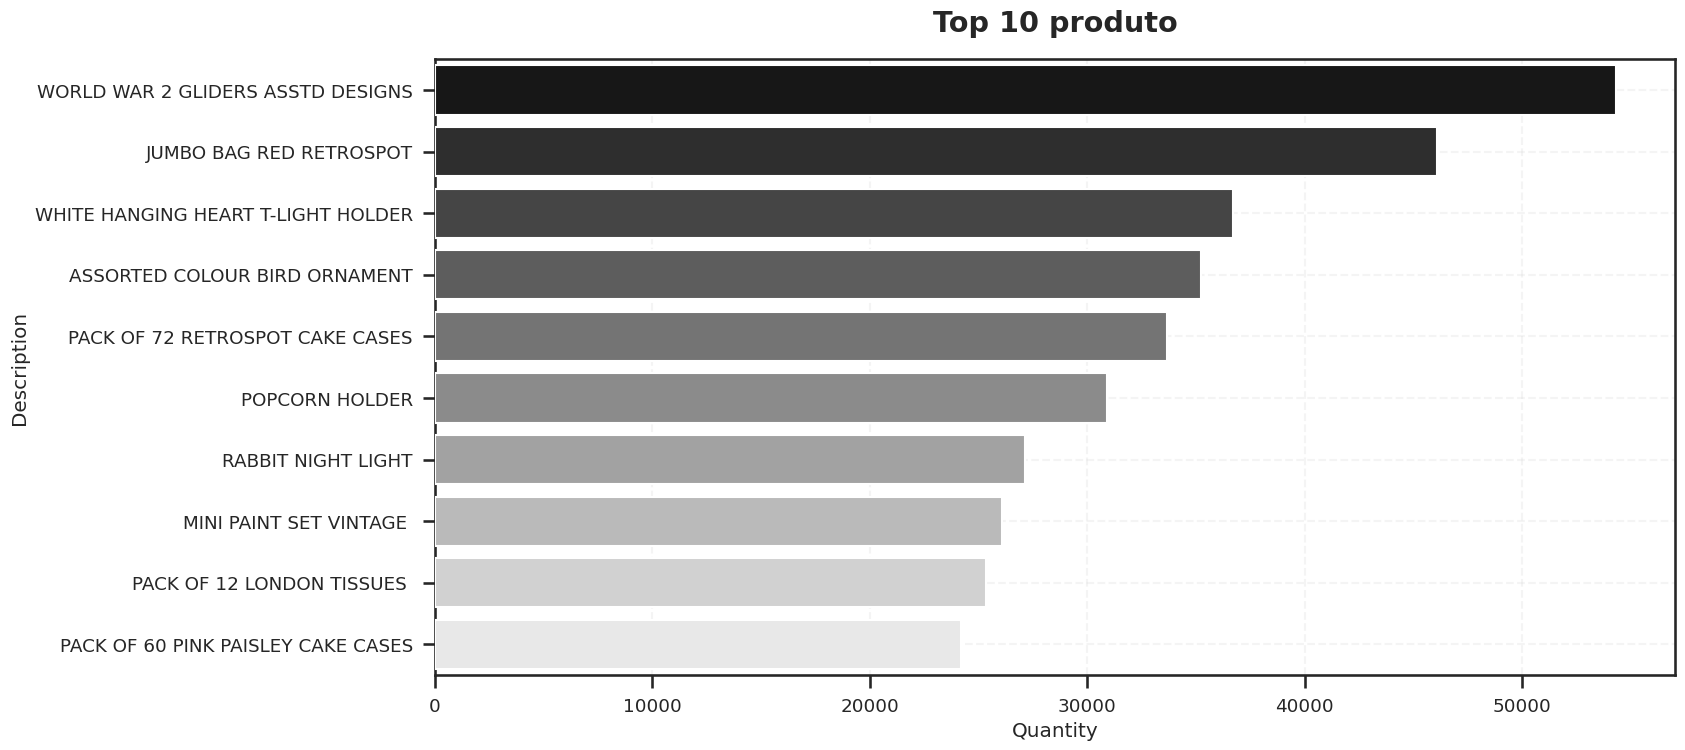

In [ ]:
#PLOTANDO GRÁFICO SOBRE OS DADOS ACIMA
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (16,8))
sns.barplot(data = topproducts, x = 'Quantity', y = 'Description', ax = ax, palette = "gray", zorder = 10)
ax.set_xlabel('Quantity')
ax.set_ylabel('Description')
ax.set_title("Top 10 produto")
ax.grid(True, linestyle='--', zorder = 10)

In [ ]:
def total_mes(df1:pd.DataFrame)->pd.DataFrame:
    totalmes = (df1.groupby("InvoiceDate").agg({"total":"sum"}).reset_index())
    return totalmes
totalmes = total_mes(df1)


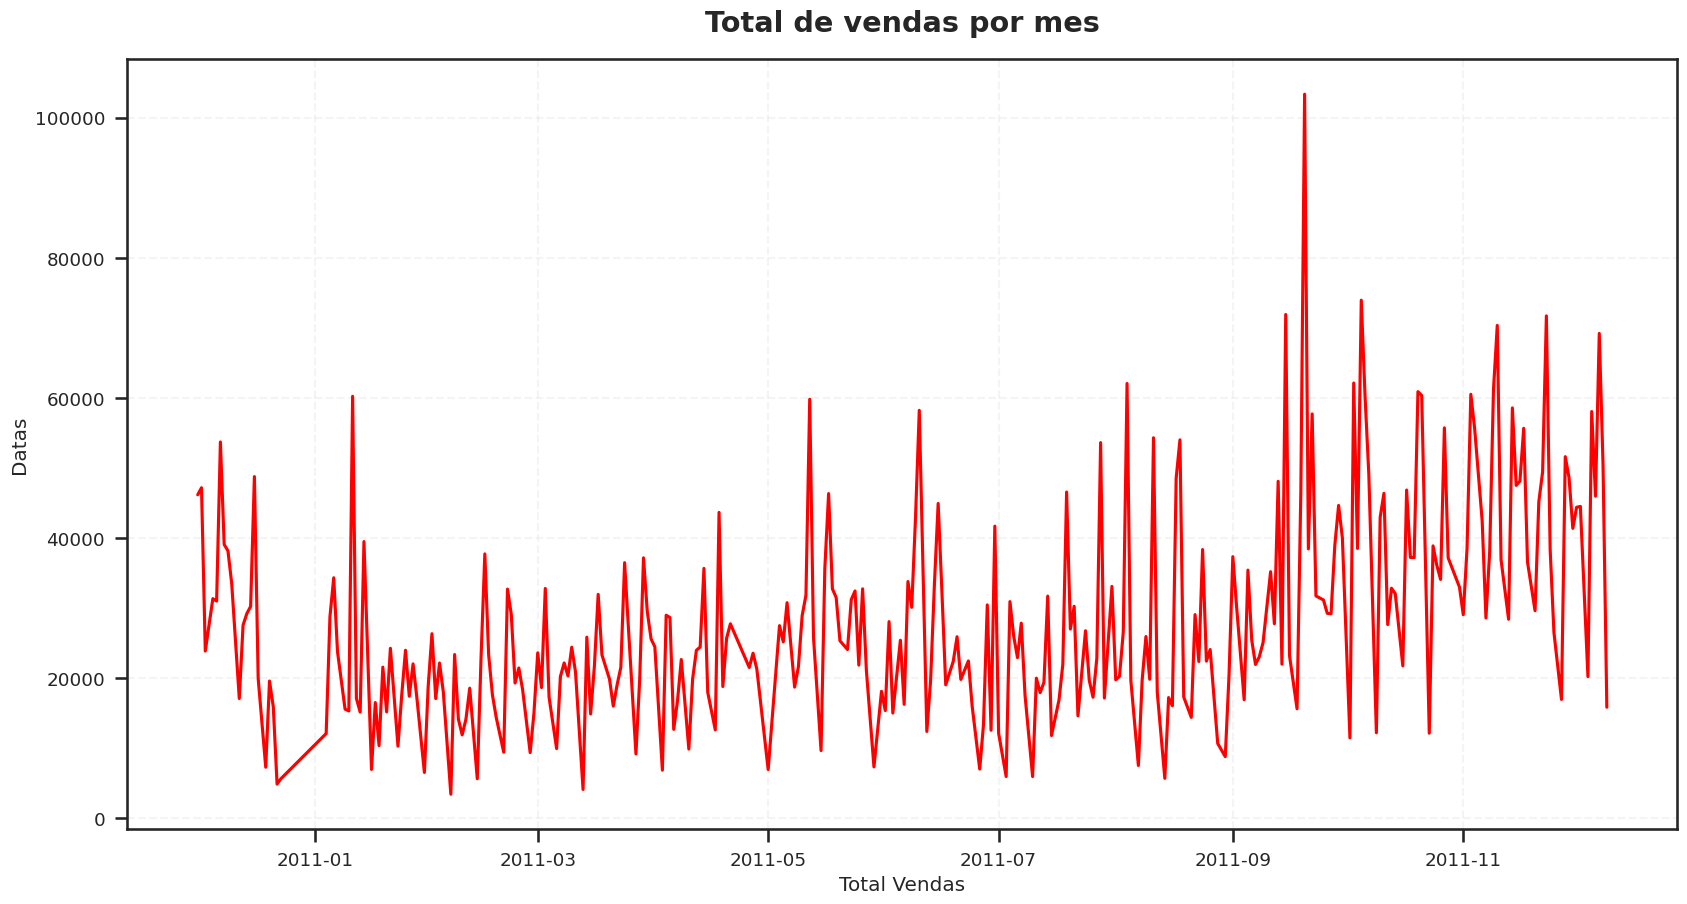

In [ ]:
#VARIAÇÃO DE VENDAS POR MÊS
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (20,10))
sns.lineplot(data = totalmes, x = "InvoiceDate", y = "total", ax = ax, color = 'red', zorder = 10)
ax.set_xlabel('Total Vendas')
ax.set_ylabel('Datas')
ax.set_title("Total de vendas por mes")
ax.grid(True, linestyle = '--', zorder = 10)

In [ ]:
#MAIORES COMPRADORES POR MÊS
def vendamespais(df:pd.DataFrame, n:int)->pd.DataFrame:
    vendatotalpais = (df1.groupby(["InvoiceDate", "Country"]).agg({"total":"sum"}).sort_values(by = "total", ascending = False).reset_index().head(n))
    return vendatotalpais
vendatotalpais = vendamespais(df1, 10)
vendatotalpais

,InvoiceDate,Country,total
0,2011-09-20,United Kingdom,100417.10
1,2011-09-15,United Kingdom,67824.46
2,2011-10-03,United Kingdom,61799.07
3,2011-11-09,United Kingdom,58897.32
4,2011-11-03,United Kingdom,56802.17
5,2011-11-23,United Kingdom,56292.41
6,2011-11-10,United Kingdom,55279.60
7,2011-12-05,United Kingdom,54792.12
8,2011-08-04,United Kingdom,53721.53
9,2011-01-11,United Kingdom,53560.03


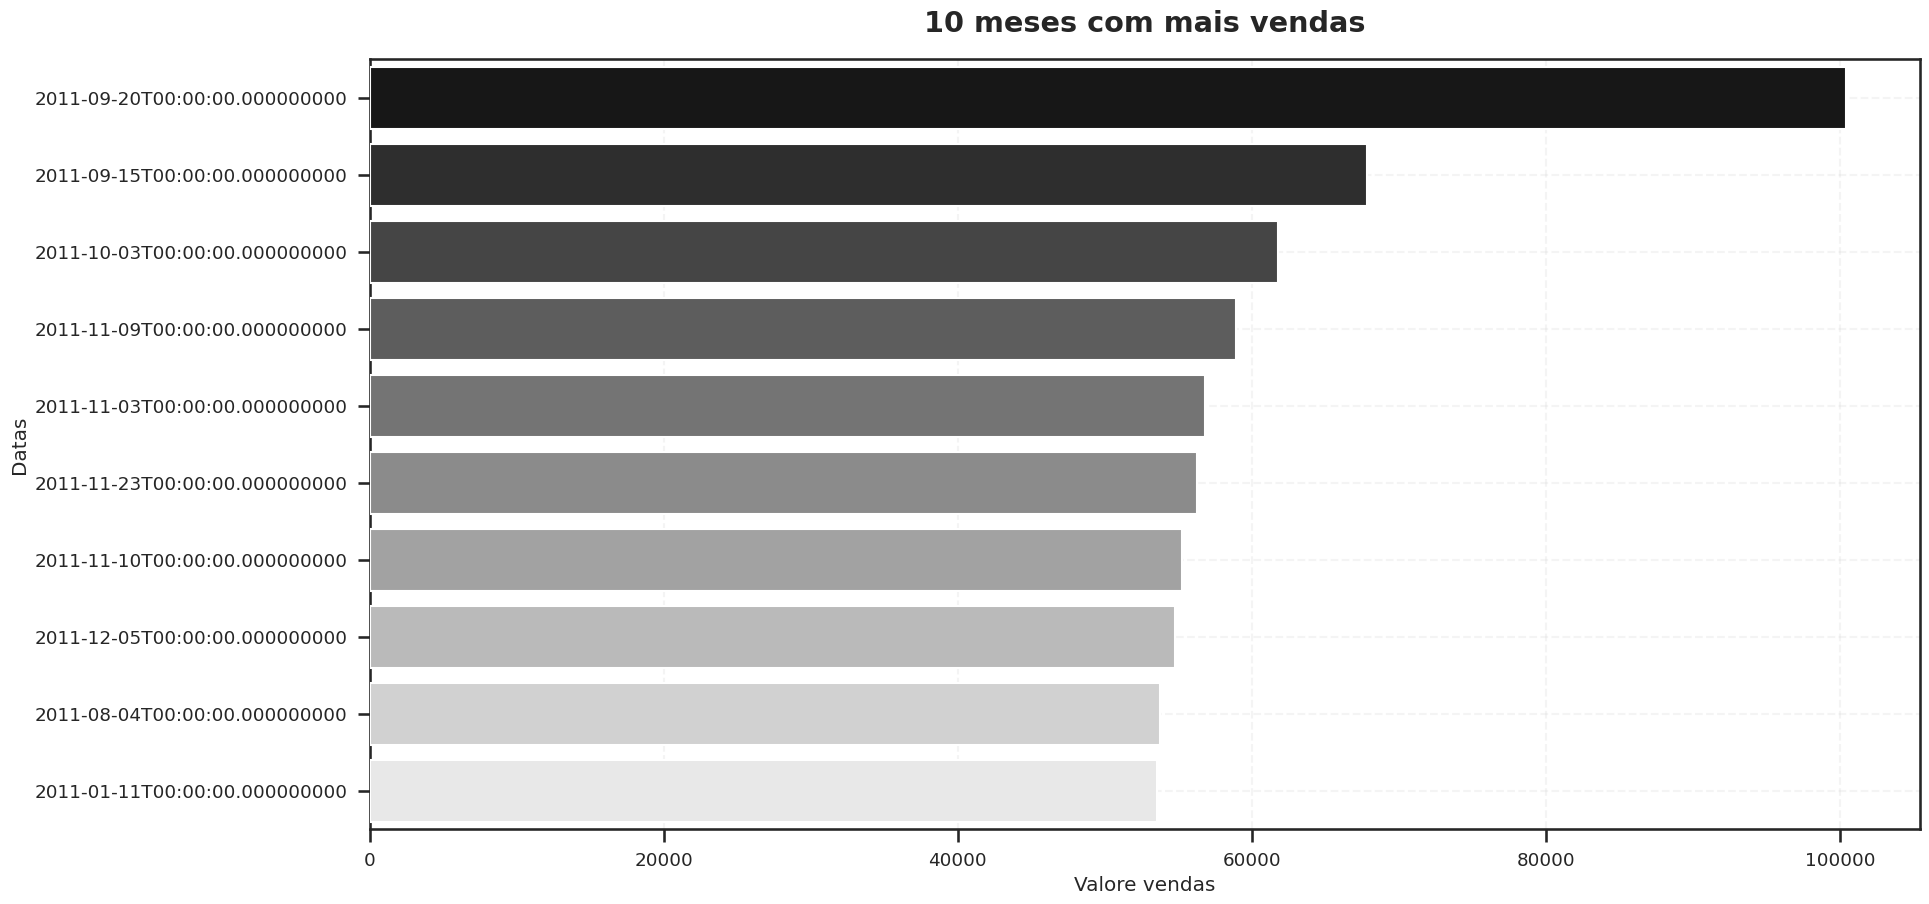

In [ ]:
#CRIAÇÃO DE GRÁFICO DOS DADOS ACIMA
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (20,10))
sns.barplot(data = vendatotalpais, x = "total", y = "InvoiceDate", ax = ax, palette = 'gray', zorder = 10)
ax.set_xlabel('Valore vendas')
ax.set_ylabel('Datas')
ax.set_title("10 meses com mais vendas")
ax.grid(True, linestyle = '--', zorder = 10)

In [ ]:
df1.head(1)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850,United Kingdom,15.3


In [ ]:
#VENDO SE EXISTE NECESSIDADE DE TROCAR OU NÃO OS TIPOS DE VARIÁVEIS
df1.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID              Int64
Country                object
total                 float64
dtype: object

# CRIAÇÃODE COLUNAS QUE SERÃO NECESSÁRIAS PARA ANÁLISE DE RFM

In [ ]:
def rfm()->pd.DataFrame:
  rfm=(df1.groupby("CustomerID").agg({"InvoiceDate":lambda x : (pd.Timestamp("2012-01-01") - x.max()).days,"InvoiceNo":"nunique","total":lambda x : x.mean()})
  .rename(columns = {"InvoiceDate": "recency", "InvoiceNo": "frequency", "total": "monetary"})
  .reset_index())
  return rfm
rfm = rfm()


In [ ]:
#TRANSFORMAÇÃO DE CUSTOMERID PARA INDEX
rfm = rfm.set_index("CustomerID")

In [ ]:
#AJUSTANDO VALORES DE 95%
rfm_clip = rfm.apply(lambda x:x.clip(upper = x.quantile(0.95)))

In [ ]:
rfm_clip_scaled = rfm_clip.apply(scale).copy()

# ENTENDER CLIENTES ATRAVÉS DE PONTUAÇÃO E CLASSIFICAÇÃO

In [ ]:
rfm["r_rank"] = rfm["recency"].rank(ascending = False)
rfm["f_rank"] = rfm["frequency"].rank(ascending = True)
rfm["m_rank"] = rfm["monetary"].rank(ascending = True)
rfm


,recency,frequency,monetary,r_rank,f_rank,m_rank
CustomerID,,,,,,
12347,25,7,23.681319,4151.5,3705.0,3148.0
12348,98,4,57.975484,1642.0,3025.5,3970.0
12349,41,1,24.076027,3205.5,747.0,3175.0
12350,333,1,19.670588,226.5,747.0,2615.0
12352,59,8,29.482824,2498.5,3825.5,3504.0
...,...,...,...,...,...,...
18280,300,1,18.060000,354.0,747.0,2236.5
18281,203,1,11.545714,860.0,747.0,1017.0
18282,30,2,14.837500,3834.5,1908.5,1386.0


In [ ]:
#NORMALIZAÇÃODE RANKING PARA CALCULAR RFM
norm = (rfm.agg({"r_rank": lambda x:x.div(rfm["r_rank"].max())*100,"f_rank": lambda x:x.div(rfm["f_rank"].max())*100,"m_rank": lambda x:x.div(rfm["m_rank"].max())*100})
.rename(columns = {"r_rank":"r_norm", "f_rank":"f_norm", "m_rank":"m_norm"}))

rfm = (pd.concat([rfm, norm], axis = 1)
.drop(columns = ["r_rank", "f_rank", "m_rank"]))

In [ ]:
rfm.head()

,recency,frequency,monetary,r_norm,f_norm,m_norm
CustomerID,,,,,,
12347,25,7,23.681319,96.177459,85.506577,72.651742
12348,98,4,57.975484,38.040079,69.824602,91.622432
12349,41,1,24.076027,74.261555,17.239788,73.274867
12350,333,1,19.670588,5.247307,17.239788,60.350796
12352,59,8,29.482824,57.882544,88.287561,80.867759


In [ ]:
#CALCULANDO SCORE
rfm["Score"]=rfm.apply(lambda row :0.15*row["r_norm"]+0.28*row["f_norm"]+0.57*row["m_norm"], axis=1 )
rfm['Score'] *= 0.05 # rfm["Score"].apply(lambda x:x * 0.05)
rfm=rfm[["monetary", "Score"]].sort_values(by="Score", ascending=False)

In [ ]:
rfm

,monetary,Score
CustomerID,,
18102,602.453132,4.984930
17949,835.864000,4.973743
17389,149.453897,4.908101
16013,267.126619,4.906938
17857,497.760000,4.896698
...,...,...
15880,3.427396,0.289608
16893,3.242889,0.285898
17968,3.272840,0.279754


In [ ]:
rfm["segment"]=(
np.where(rfm["Score"]>4.5, "TopCustomer",
(np.where(rfm["Score"] >4 , "HighValue",
(np.where(rfm["Score"]>3, "Medium customer",
(np.where(rfm["Score"]>1.6, "Low Customer", "LostCustomer"))))))))
rfm


,monetary,Score,segment
CustomerID,,,
18102,602.453132,4.984930,TopCustomer
17949,835.864000,4.973743,TopCustomer
17389,149.453897,4.908101,TopCustomer
16013,267.126619,4.906938,TopCustomer
17857,497.760000,4.896698,TopCustomer
...,...,...,...
15880,3.427396,0.289608,LostCustomer
16893,3.242889,0.285898,LostCustomer
17968,3.272840,0.279754,LostCustomer


In [ ]:
#CRIAÇÃO DE UMA MÉDIA DE MONETARY
def segmentacao(df:pd.DataFrame):
    segment = (rfm.groupby("segment").agg({"monetary":"mean"}).sort_values(by = "monetary", ascending = False).reset_index())
    return segment
segment=segmentacao(rfm)
segment

,segment,monetary
0,TopCustomer,136.711572
1,HighValue,87.272791
2,Medium customer,79.261714
3,Low Customer,17.622083
4,LostCustomer,8.903197


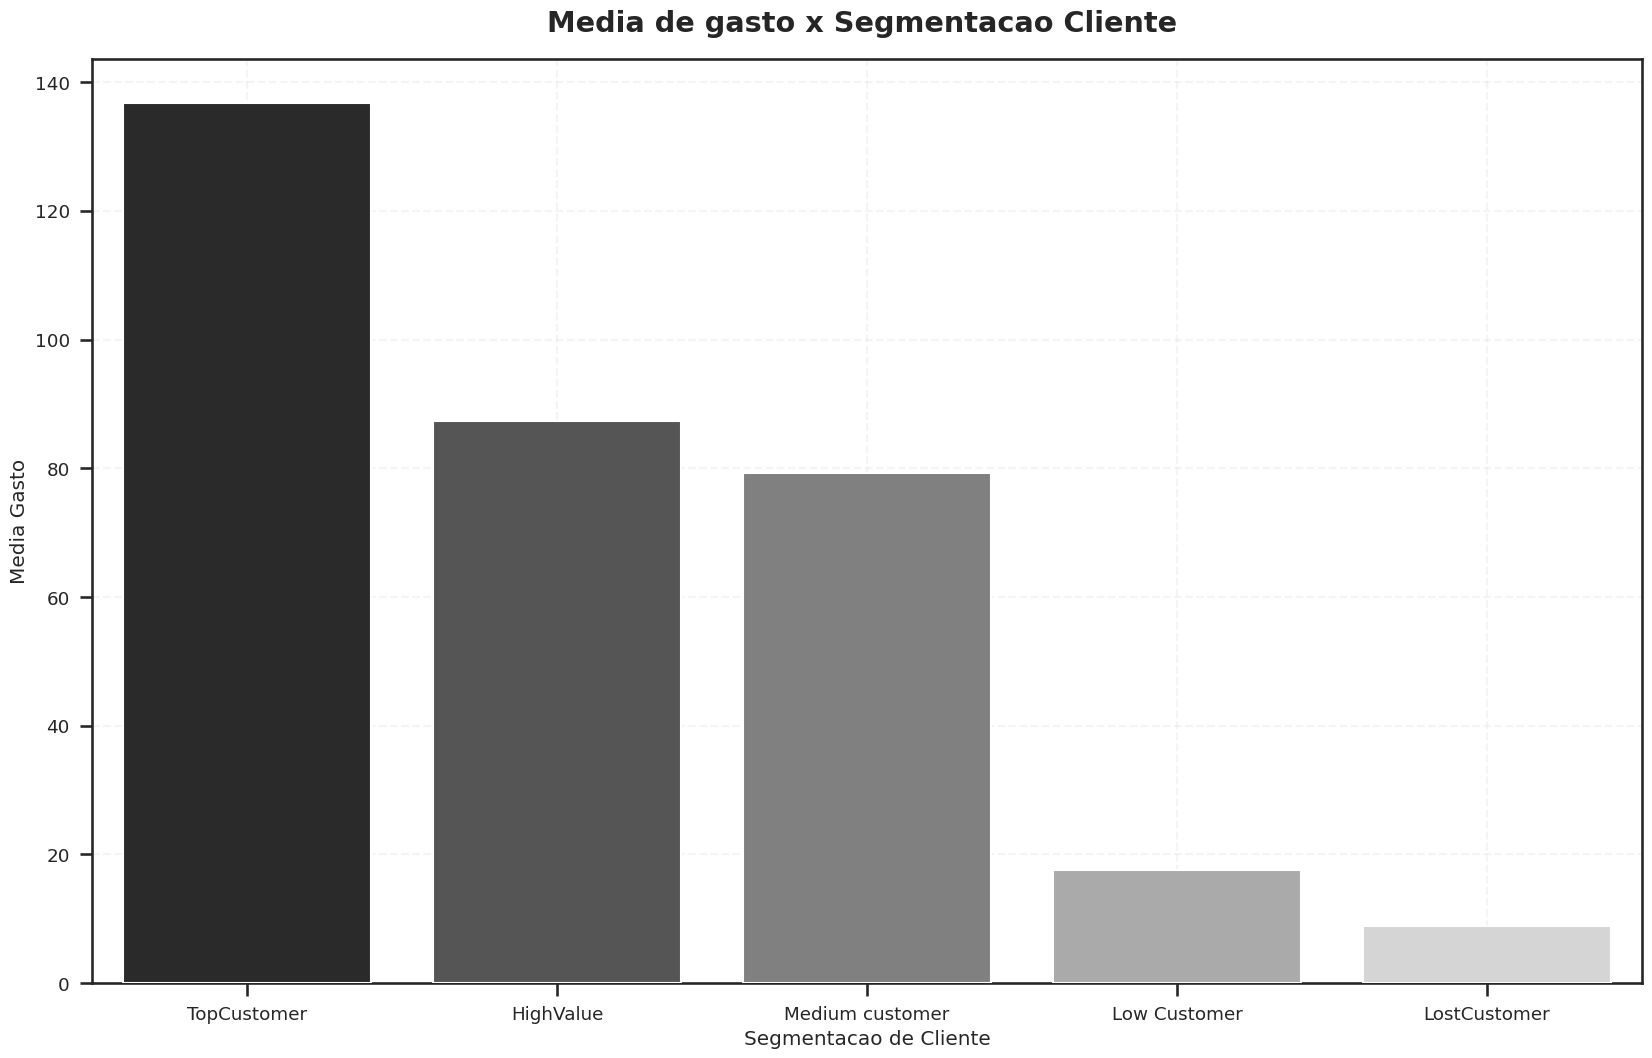

In [ ]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (20,12))
sns.barplot(data = segment, x = 'segment', y = 'monetary', ax = ax, palette = 'gray', zorder = 10)
ax.set_xlabel('Segmentacao de Cliente')
ax.set_ylabel('Media Gasto')
ax.set_title("Media de gasto x Segmentacao Cliente ")
ax.grid(True, linestyle='--', zorder = 10)

# MODELING CLUSTERIZAÇÃO ML

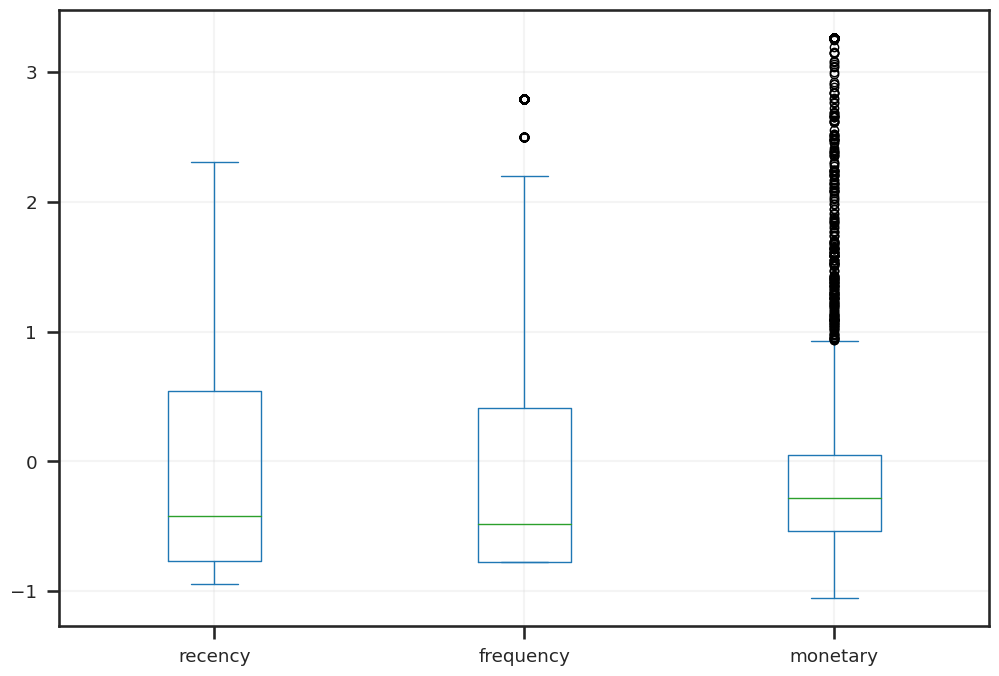

In [ ]:
rfm_clip_scaled.plot.box();

In [ ]:
rfm_clip_scaled

,recency,frequency,monetary
CustomerID,,,
12347,-0.923645,1.009246,-0.003135
12348,-0.159452,0.116237,1.613647
12349,-0.756151,-0.776771,0.015473
12350,2.300623,-0.776771,-0.192219
12352,-0.567719,1.306915,0.270374
...,...,...,...
18280,1.955166,-0.776771,-0.268150
18281,0.939731,-0.776771,-0.575263
18282,-0.871303,-0.479101,-0.420073


**KMeans**

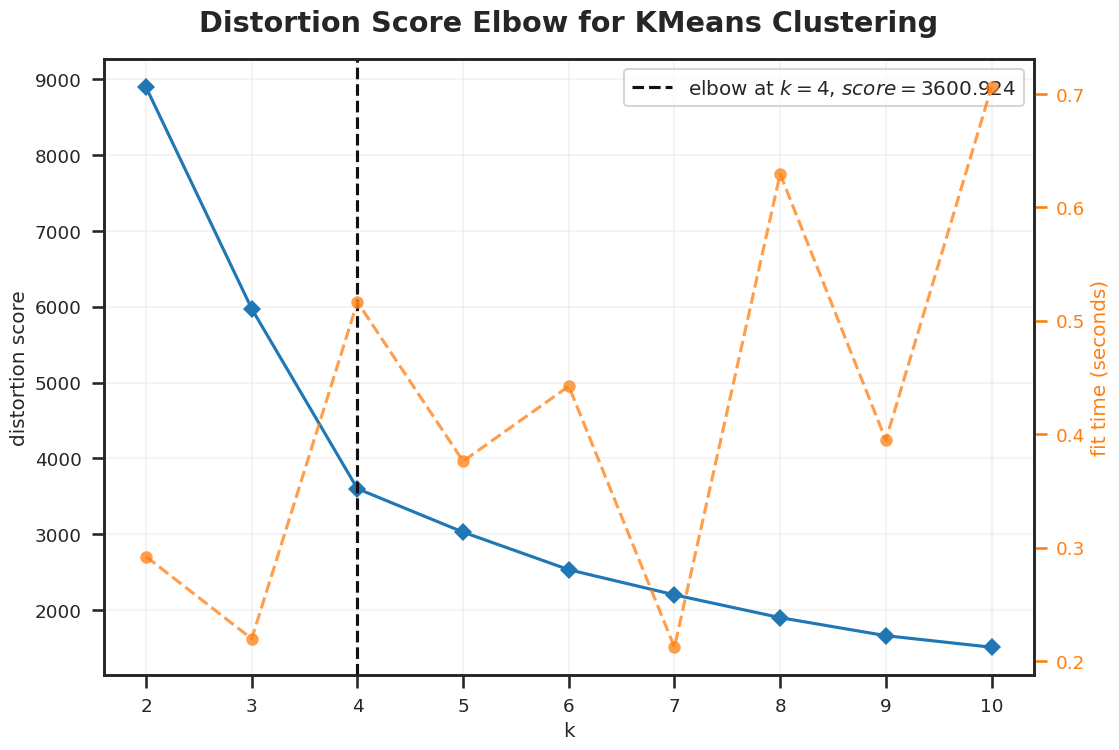

KElbowVisualizer(ax=<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=KMeans(n_clusters=10))

In [ ]:
#ENTENDENDO K PARA O MODELO
kelbow_visualizer(KMeans(), rfm_clip_scaled, k = 10, timing = True)

In [ ]:
cluster_metrics = silhouette_score, davies_bouldin_score, calinski_harabasz_score
cluster_metrics_results = []
x = rfm_clip_scaled

for k in range (2,11):
  model = KMeans(n_clusters = k, random_state = 0)
  labels = model.fit_predict(x)
  cluster_results_dict = {"k": k}
  cluster_results_dict["inertia"] = model.inertia_
  for metric in cluster_metrics:
    cluster_results_dict[metric.__name__] = metric(x, labels)
  cluster_metrics_results.append(cluster_results_dict)

cluster_metrics_results

pd.DataFrame(cluster_metrics_results).set_index("k").style.background_gradient(axis = 0)

,inertia,silhouette_score,davies_bouldin_score,calinski_harabasz_score
k,,,,
2,8897.717731,0.383540,1.063996,1996.388990
3,5974.487985,0.436576,0.856878,2545.503545
4,3600.933069,0.480520,0.702633,3766.082380
5,3028.299888,0.485948,0.736916,3562.493122
6,2532.638309,0.398587,0.850267,3576.349142
7,2200.761372,0.377413,0.868837,3537.652991
8,1901.258351,0.384304,0.864504,3606.463554
9,1662.025755,0.394846,0.803068,3686.851071
10,1509.745369,0.352417,0.889155,3655.366057


In [ ]:
#PREDIZENDO OS 4 CLUSTER
KMeans = KMeans(4)
centroids = model.cluster_centers_
KMeans_labels = KMeans.fit_predict(rfm_clip_scaled)

In [ ]:
#PLOTANDO GRÁFICO 3D PARA ENTENDER COMO OS CLUSTER ESTÃO DISPOSTOS
px.scatter_3d(data_frame = rfm_clip, x = "frequency", y = "recency", z = "monetary", color = KMeans_labels.astype(str))

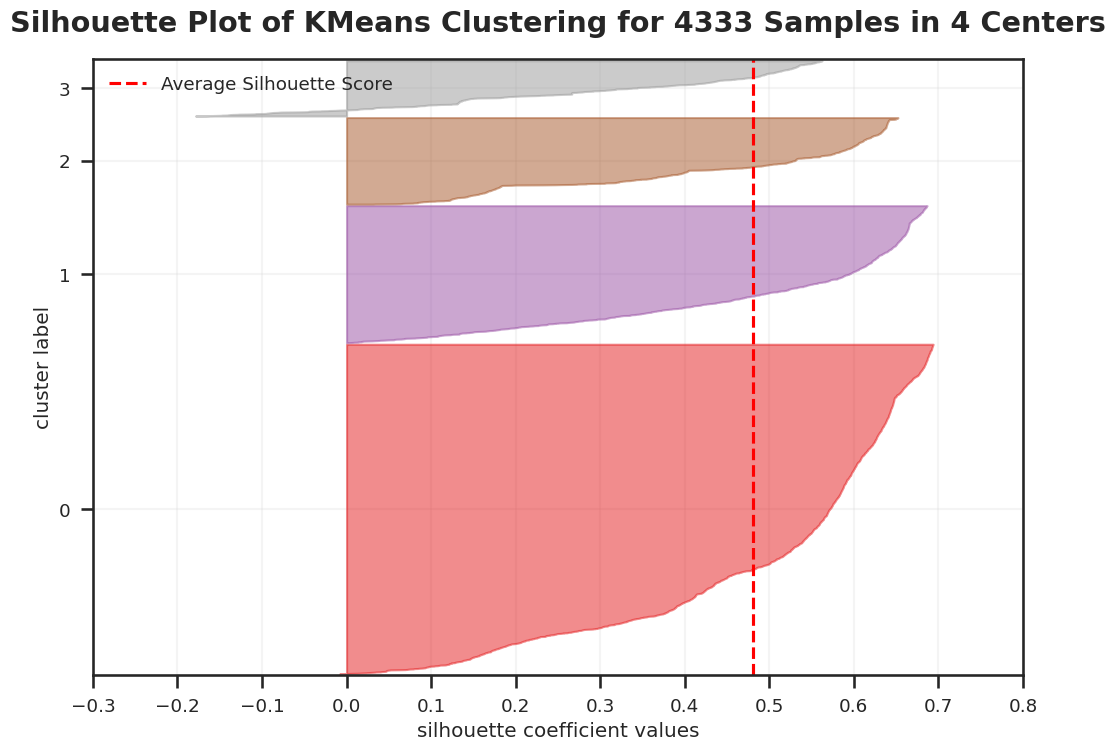

SilhouetteVisualizer(ax=<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 4333 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>,
                     estimator=KMeans(n_clusters=4))

In [ ]:
silhouette_visualizer(KMeans, x)

**Hirarchical** **Clustering**

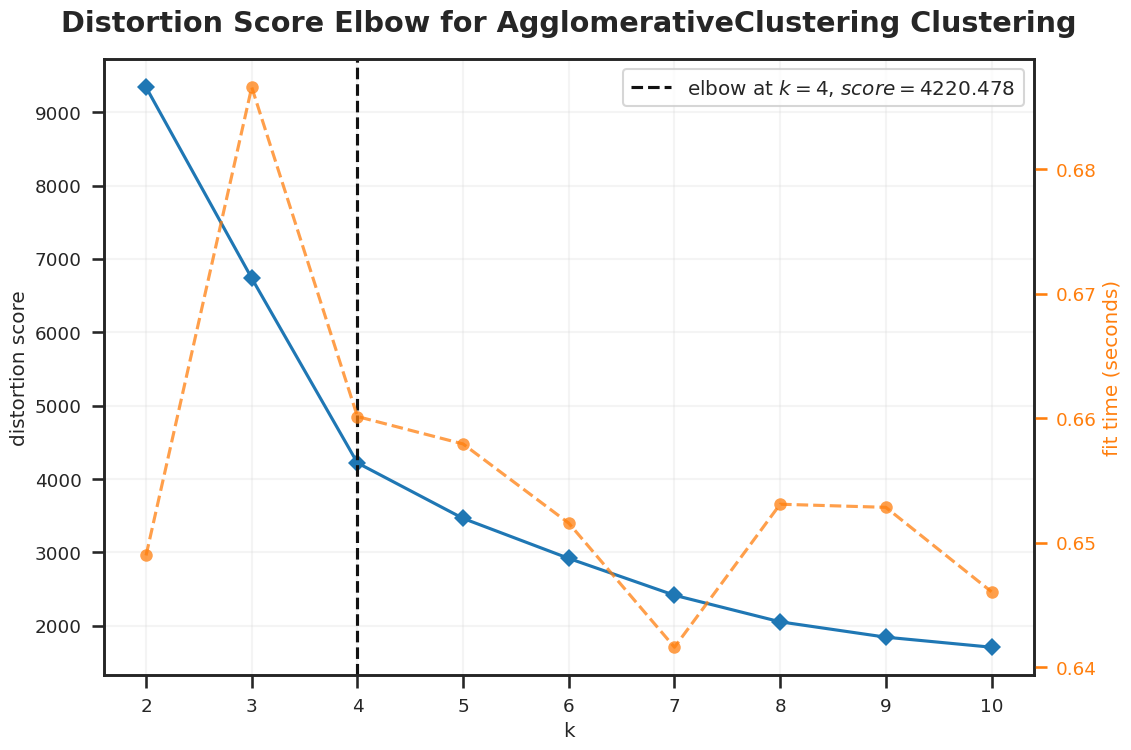

KElbowVisualizer(ax=<Axes: title={'center': 'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=AgglomerativeClustering(n_clusters=10))

In [ ]:
#ENTENDENDO MELHOR K PARA O MODELO
kelbow_visualizer(AgglomerativeClustering(), rfm_clip_scaled, k=10, timing=True)

In [ ]:
cluster_metrics = silhouette_score, davies_bouldin_score, calinski_harabasz_score
cluster_metrics_results = []
x=rfm_clip_scaled

for k in range (2,11):
  model = AgglomerativeClustering(n_clusters=k)
  labels = model.fit_predict(x)
  cluster_results_dict = {"k": k}
  for metric in cluster_metrics:
    cluster_results_dict[metric.__name__] = metric(x, labels)
  cluster_metrics_results.append(cluster_results_dict)

cluster_metrics_results

pd.DataFrame(cluster_metrics_results).set_index("k").style.background_gradient(axis= 0 )

,silhouette_score,davies_bouldin_score,calinski_harabasz_score
k,,,
2,0.339129,1.361129,1697.283749
3,0.377154,0.930696,2012.332235
4,0.429884,0.787499,3001.414832
5,0.365180,0.854761,2977.822990
6,0.356766,0.882549,2987.792330
7,0.365796,0.812687,3155.959652
8,0.371544,0.858257,3289.550675
9,0.378055,0.812856,3264.947145
10,0.334074,0.906980,3172.347732


In [ ]:
hclust = AgglomerativeClustering(n_clusters = 4)
hclust_labels = hclust.fit_predict(rfm_clip_scaled)

In [ ]:
px.scatter_3d(data_frame = rfm_clip, x = "frequency", y = "recency", z = "monetary", color =hclust_labels.astype(str))

**GussianMixture**

In [ ]:
results = []
k_range = range( 1,9 )
covariance_types = ["full", "tied", "diag", "spherical"]
x = rfm_clip_scaled
for n_components in k_range:
  for covariance_type in covariance_types:
    nclust = GaussianMixture(n_components = n_components, n_init=3,  warm_start = True, covariance_type = covariance_type)
    nclust.fit(x)
    results.append({
        "bic":nclust.bic(x),
        "n_components": n_components,
        "covariance": covariance_type,
        })

results = pd.DataFrame(results)
results.sort_values("bic").head()

,bic,n_components,covariance
28,-231.206153,8,full
24,162.799693,7,full
30,6804.553590,8,diag
26,6890.356518,7,diag
18,12350.197985,5,diag


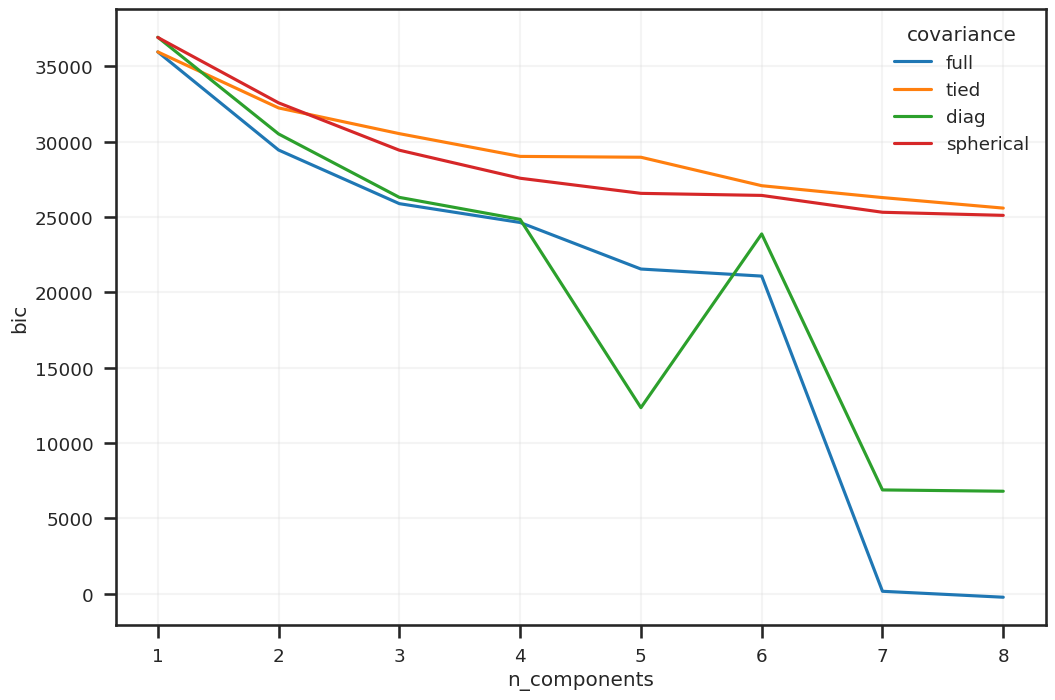

In [ ]:
sns.lineplot(data = results, x = "n_components", y = "bic", hue = "covariance");

In [ ]:
nclust = GaussianMixture(n_components = 5, covariance_type = "diag", n_init = 10)
nclust_labels = nclust.fit_predict(x)

In [ ]:
px.scatter_3d(data_frame = rfm_clip, x ="frequency", y = "recency", z = "monetary", color = nclust_labels.astype(str))

# INTERPRETANDO OS CLUSTERS

In [ ]:
#CRIANDO UM DATAFRAME
centers = pd.DataFrame(KMeans.cluster_centers_, columns=rfm_clip_scaled.columns)
centers

,recency,frequency,monetary
0,-0.468644,-0.269743,-0.309408
1,1.558171,-0.625496,-0.261594
2,-0.740270,1.959182,-0.154670
3,0.089877,0.087528,2.732532


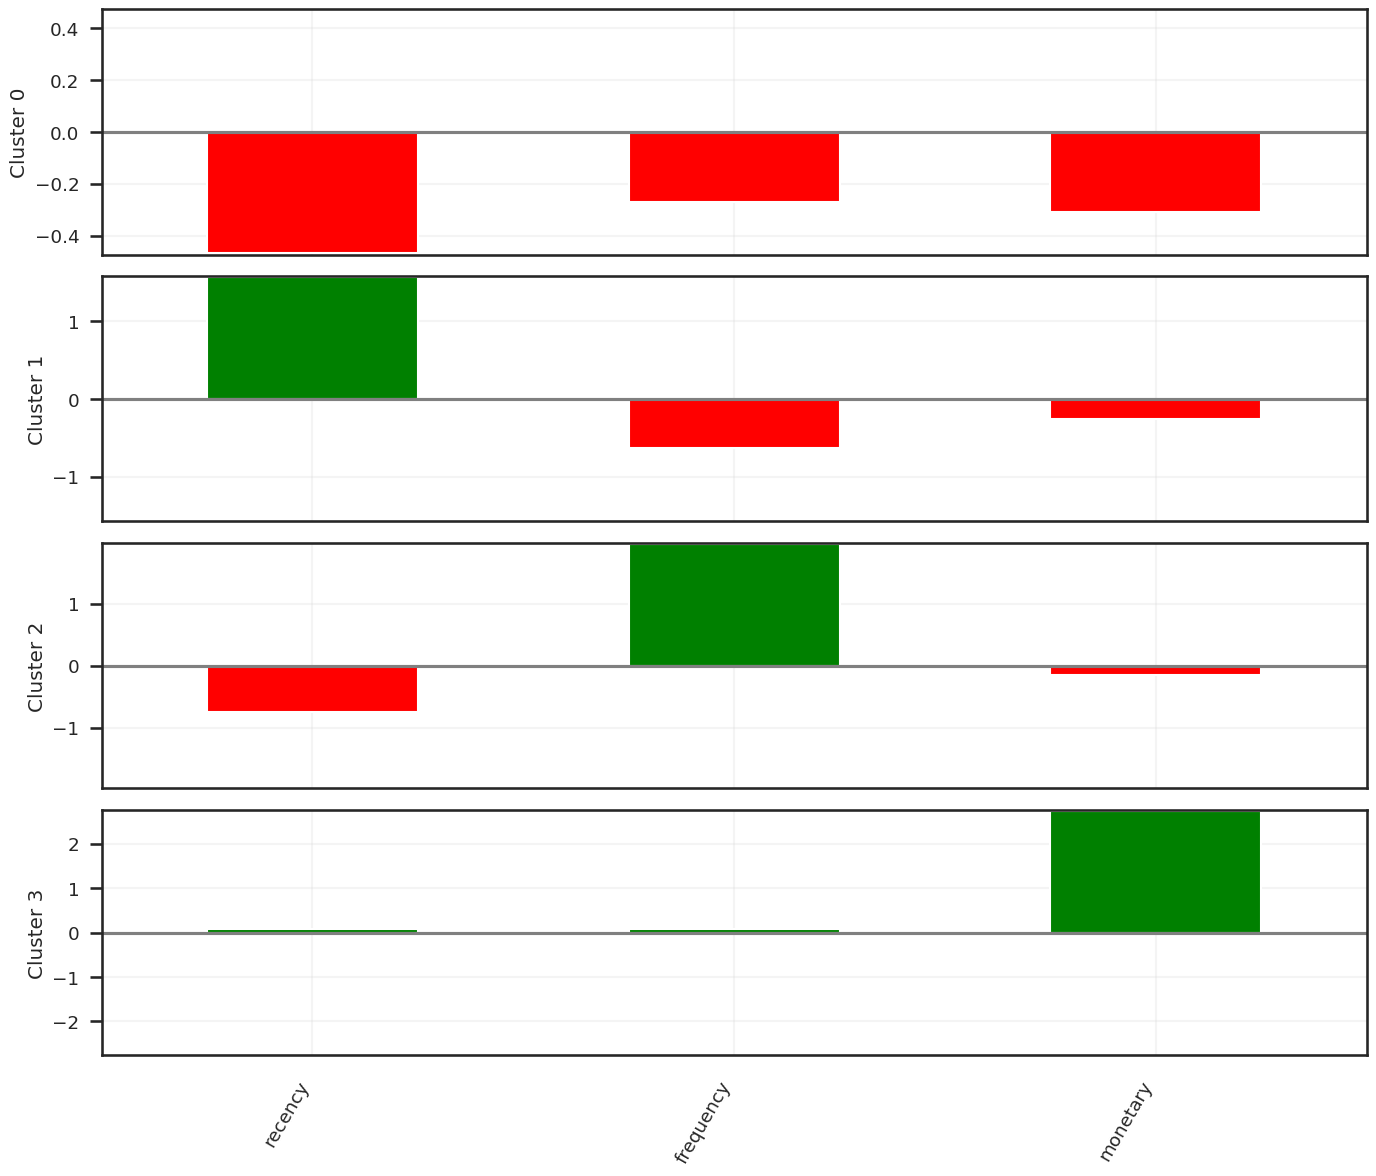

In [ ]:
#PLOTANDO GRÁFICO PARA FAZER A ANÁLISE DE CLUSTERS
fig,axes = plt.subplots(nrows=4, figsize=(14,12), sharex=True)

for i,ax in enumerate(axes):
  center = centers.loc[i,:]
  maxPC = 1.01 * center.abs().max()
  colors = ['green' if l > 0 else 'red' for l in center]
  center.plot.bar(ax = ax, color = colors)
  ax.set_ylabel(f'Cluster {i}')
  ax.set_ylim(-maxPC, maxPC)
  ax.axhline(color = 'gray')
  ax.xaxis.set_ticks_position('none')

plt.xticks(rotation = 60, ha = 'right')
plt.tight_layout()
plt.show()

In [ ]:
#ENTENDENDO PERCENTUAL DE CLIENTES PARA CADA CLUSTER
df_cluster_perc = (pd.DataFrame(KMeans_labels).value_counts().div(len(rfm_clip_scaled))*100)
df_cluster_perc = df_cluster_perc.apply(lambda x: f"{x:.2f}%")
df_cluster_perc

0    54.14%
1    22.52%
2    14.24%
3     9.09%
dtype: object

# CONSIDERAÇÕES DEPOIS DA ANÁLISE FEITA

1.   A análise apresentou que faltaram dados de 24% no CustomerID, porém foram retirados os valores que faltaram.
*    Pode ser feito uma análise no banco de daods para entender e ver se poderá ser feito alguma coisa para reaver os valores que faltaram no CustomerID.

2.   Valores externos e negativos foram tratados da mesma maneira, alguns valores acima de 10 mil e pedidos 5 mil foram retirados além de condiçoes negativas.
*    Pode-se entender que esses valores teriam sido devolvidos.

3.   Mesmo após o tratamento dos dados 1 valor ainda apresentou uma grande elevação, sendo assim também foi retirados do estudo em questão
*    Analisar se os valores do cliente estão corretos.

4.   Alem do tratamento de transformar os valores na mesma grandeza e continuo, foi tratado valores extremos restantes, onde trouxemos valores extremos para dentro do valor aceitavel de 3 desvio padrão.

5.   Foi escolhido o método Kmeans, com 4 tipo de clusters bem definidos, podemos também denominar de segmentações de clientes. Para cada tipo de cliente devemos ter abordagens diferentes para aumentar, manter, ou trazer o cliente de volta.

6.   Melhor pool de clientes (9%): Caracteristica do cluster-> Alto valor monetario/ com baixa recencia e baixa frequencia Ela tem a caracteristica de comprar bastante porem com uma frequencia mais baixa, porem sempre com tickets medio ou valor total bem alto.
*    implementar um clube de vantagens onde o cliente se sinta importante para a empresa.

7.   Clientes bons(14%): caracteristicas desse cluster-> clientes com baixa recencia, alta frequencia, isso sinaliza que esses clientes que consomem na nossa plataforma, porem apresentam um valor consumido mais baixo
*    implementação de alguma espécie de promoção com produtos similares porém com preços mais elevados.

8.   Clientes novos(54%): caracteristicas desse cluster-> apresenta um recencia muito baixa, um frequencia baixa, e um consumo monetario baixo.
*    fazer uma abordagem em diferentes frentes, tanto em mídias sociais, quanto em propagandas ou até mesmo promoções.

9.   Segmentaria de cluster ->entender melhor as necissidades deles, como padroes, prodrutos pois olhando como um grupo como todo nao conseguimos entender nuances de comportamento.

10.  Campanhas segmentadas-> apos segmentacaos do cluster conseguimos atingir melhor esses clientes novos com campanhas adicionais de marketing, trazendo uma assertividade maior consequentemente trazer o cluster de clientes novos para um cluster acima.

11.  Clientes que pararam de utilizar a plataforma(22%):caracteristicas do cluster-> recencia alta, frequencia baixa, baixo consumo.
*    realizar ligações para entender possíveis motivos que possibilataram o término de utilização de nossa plataforma. Após isso, fazer novas análises e buscar possíveis melhorias.

12.  Campanhas de email marketing-> uso dos dados historicos de compras no site e criar campanhas de email personalizados e tambem uma pesquisa de de satisfacao para entender o porque parou de usar a plataforma.

13.  Cupons em datas especificas possibilitariam facilitar a abordagem do ecommerce.
